# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

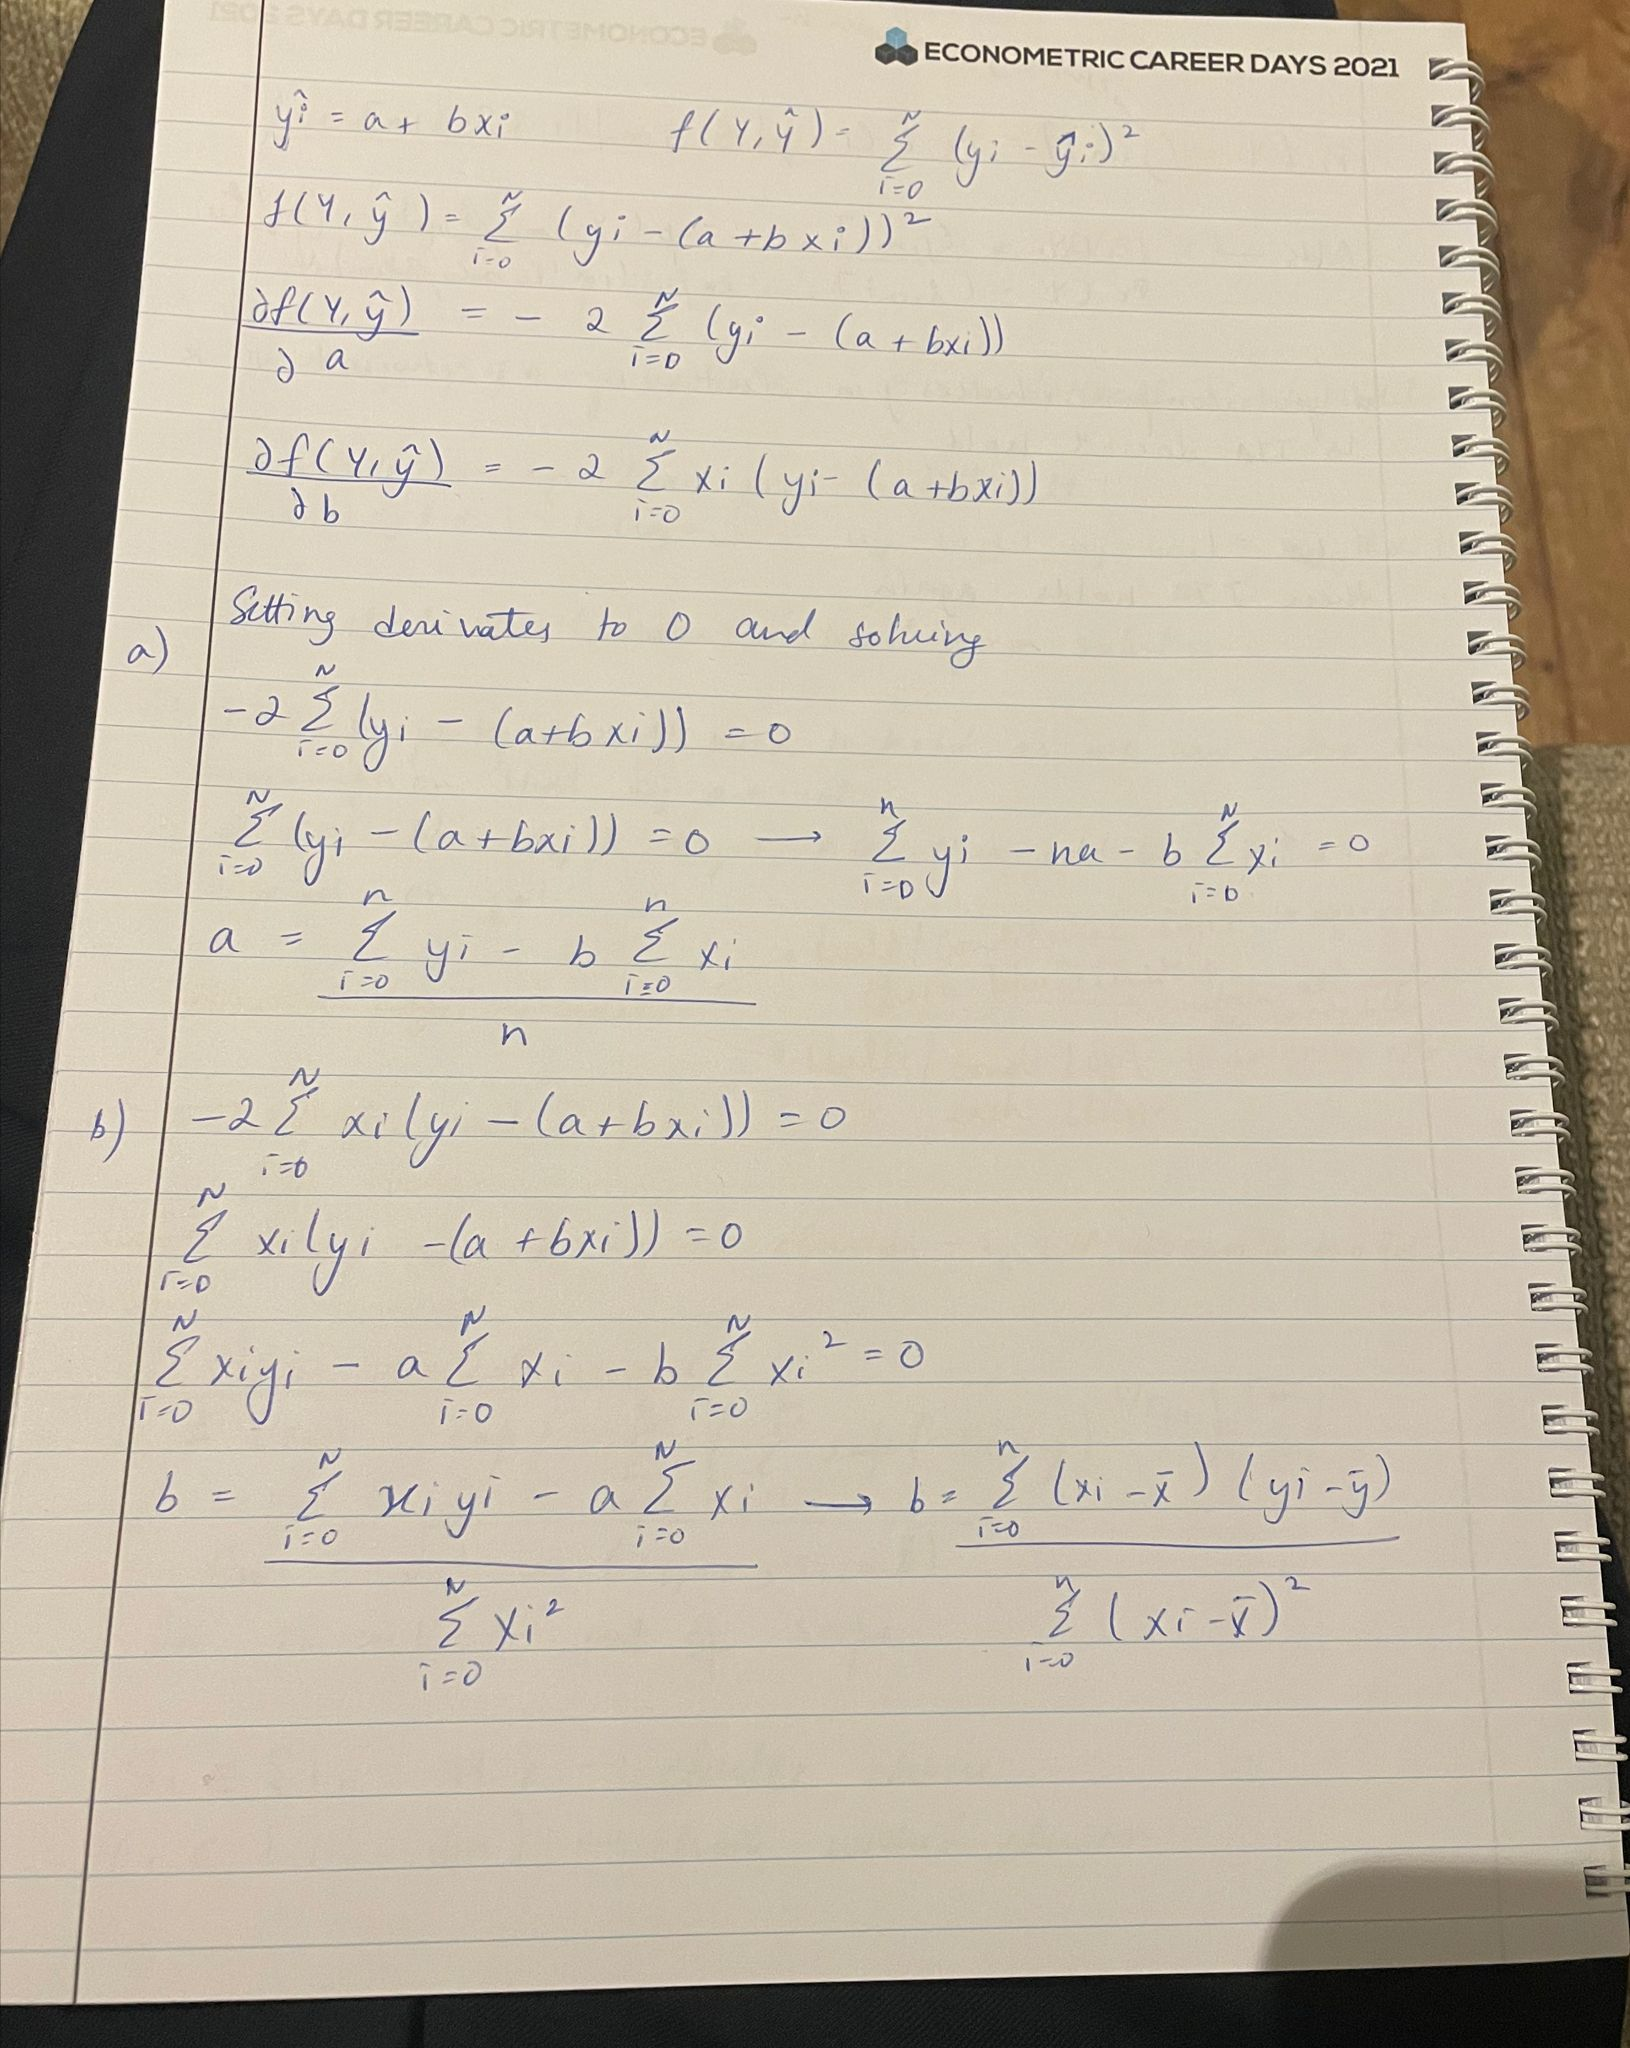

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

There is typically one unique minimum (global minimum) in the loss function as it is usually a convex like shape. This implies that there is only one combination of a and b that minimizes the loss function, providing a unique solution for the coefficients. There is a possibility that the loss function is not convex and in that situation there can multiple local minima. 

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

When you minimize the SSE or MSE to find the coefficients a and b, the optimization problem is essentially the same. The optimization algorithms aim to find the values of a and b that minimize the error, whether you are minimizing the sum of squared errors or the mean squared error. The 1/n in mean squared will be removed in the derivative leading to same derivatives for a and b. 

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:
![image.png](attachment:image.png)

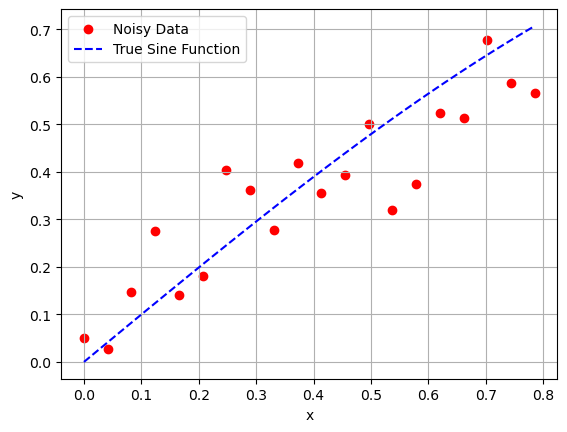

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


def generate_sin(x, epsilon):
    x_values = np.linspace(0, np.pi/4, x)
    y_values = np.sin(x_values) + np.random.normal(0, epsilon, x)
    return x_values, y_values

n_samples = 20

# TODO: create noisy function
x_noisy, y_noisy = generate_sin(n_samples, epsilon=0.1)

# TODO: create true function
x_pure = np.linspace(0, np.pi/4, 100)
y_pure = np.sin(x_pure)

# TODO: plot data, line
plt.scatter(x_noisy, y_noisy, label='Noisy Data', color='red')
plt.plot(x_pure, y_pure, label='True Sine Function', linestyle='dashed', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

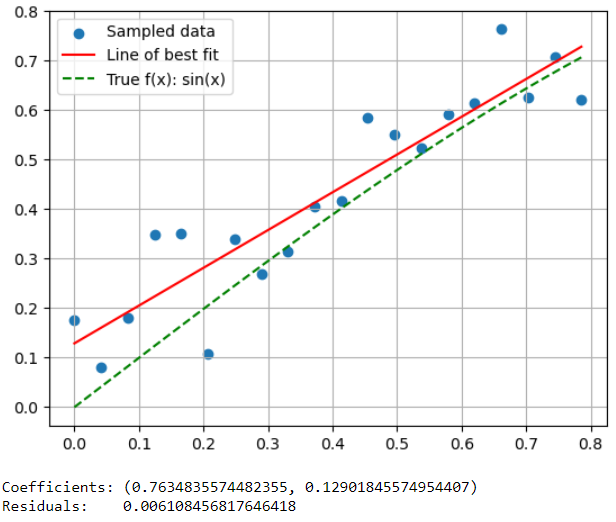

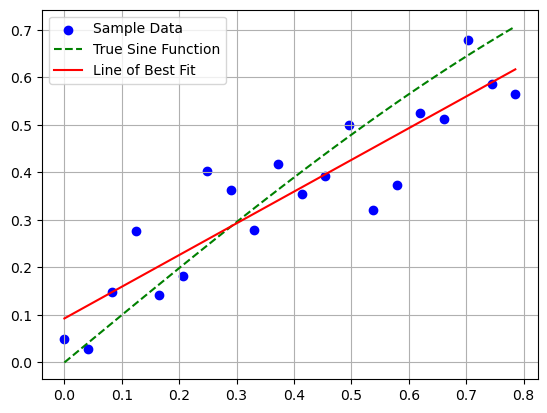

Coefficients: (0.09268036705547056, 0.6674170563973993)
Residuals:    0.11173797700728592


In [12]:
def compute_sos(y_true, y_pred):
    sos = np.sum((y_true - y_pred)**2)
    return sos

def lin_reg(xs, ys):
    n = len(xs)
    sum_x = np.sum(xs)
    sum_y = np.sum(ys)
    sum_xy = np.sum(xs * ys)
    sum_x_squared = np.sum(xs**2)
    b = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
    a = (sum_y - b * sum_x) / n

    y_pred = a + b * xs

    # Compute residuals
    residuals = compute_sos(ys, y_pred)

    return a, b, residuals

# TODO: generate line of best fit
a, b, res = lin_reg(x_noisy, y_noisy)
y_best = b * x_noisy + a


# TODO: plot line of best fit, data, etc
plt.scatter(x_noisy, y_noisy, label='Sample Data', color='blue')
plt.plot(x_pure, y_pure, label='True Sine Function', linestyle='dashed', color='green')
plt.plot(x_noisy, y_best, label='Line of Best Fit', linestyle='solid', color='red')

# make it pretty
plt.grid()
plt.legend()
plt.show()

print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

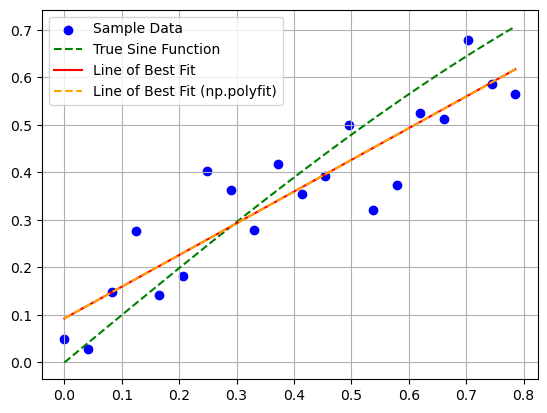

Coefficients:      (0.09268036705547056, 0.6674170563973993)
Residuals:         0.11173797700728592
Coefficients (np): (0.09268036705547084, 0.6674170563973988)
Residuals (np):    0.11173797700728592


In [14]:
# TODO: use np polyfit here
b_np, a_np = np.polyfit(x_noisy, y_noisy, 1)
y_best_np = b_np * x_noisy + a_np

# TODO: plot everything you need to
plt.scatter(x_noisy, y_noisy, label='Sample Data', color='blue')
plt.plot(x_pure, y_pure, label='True Sine Function', linestyle='dashed', color='green')
plt.plot(x_noisy, y_best, label='Line of Best Fit', linestyle='solid', color='red')
plt.plot(x_noisy, y_best_np, label='Line of Best Fit (np.polyfit)', linestyle='dashed', color='orange')

plt.grid()
plt.legend()
plt.show()

# print results
print("Coefficients:     ", (a, b))
print("Residuals:        ", compute_sos(y_noisy, y_best))
print("Coefficients (np):", (a_np, b_np))
print("Residuals (np):   ", compute_sos(y_noisy, y_best_np))


The coefficients are very close to the np coefficients and the same holds for the residuals. Polyfit is implemented very similarly to the manual way of calculation of a and b. 

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

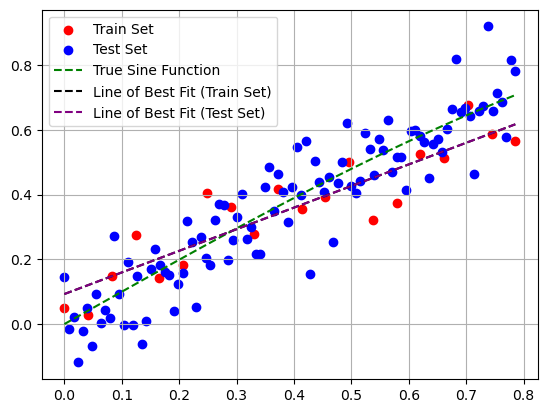

Coefficients:  (0.09268036705547056, 0.6674170563973993)
Train loss:    0.007722683902865084
Test loss:     0.007239035620865317


In [17]:
def compute_mse(y_true, y_pred, a, b):
    mse = np.mean((y_true - (a + b * np.linspace(0, np.pi/4, len(y_true))))**2)
    return mse

x_test = np.linspace(0, np.pi/4, 100)
y_test = generate_sin(100, epsilon=0.1)[1]  # getting only y-values

# TODO: plot data, lines of best fit, true function, make it pretty
plt.scatter(x_noisy, y_noisy, label='Train Set', color='red')
plt.scatter(x_test, y_test, label='Test Set', color='blue')
plt.plot(x_pure, y_pure, label='True Sine Function', linestyle='dashed', color='green')
plt.plot(x_noisy, y_best, label='Line of Best Fit (Train Set)', linestyle='dashed', color='black')
plt.plot(x_test, b * x_test + a, label='Line of Best Fit (Test Set)', linestyle='dashed', color='purple')
plt.legend()
plt.grid()
plt.show()


test_loss = compute_mse(x_test, y_test, a, b)
train_loss = compute_mse(x_noisy, y_noisy, a, b)

print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

A lower test loss is better as it is measure of how well your model performs on the test set. It provides an estimate of the model's ability to generalize to new data. Both losses are almost same so the model performs well on both train and test. 



## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

In [21]:
n_values = [20, 50, 100, 200]  
epsilon_values = [0.05, 0.1, 0.2, 0.5]  

for n in n_values:
    for epsilon in epsilon_values:
        # Generate a new dataset
        x_train, y_train = generate_sin(n, epsilon)

        # Train a linear model
        a, b, _ = lin_reg(x_train, y_train)

        # Compute training and test losses
        train_loss = compute_mse(y_train, b * x_train + a, a, b)
        test_loss = compute_mse(y_test, b * x_test + a, a, b)

        # Print results
        print(f"n={n}, epsilon={epsilon}")
        print("Coefficients:", (a, b))
        print("Train Loss (MSE):", train_loss)
        print("Test Loss (MSE):", test_loss)
        print("\n")

n=20, epsilon=0.05
Coefficients: (0.02303738810541316, 0.8739709687302966)
Train Loss (MSE): 0.002639049955459491
Test Loss (MSE): 0.00868939180990339


n=20, epsilon=0.1
Coefficients: (0.00813944144405645, 0.9383864050780159)
Train Loss (MSE): 0.007631391162125817
Test Loss (MSE): 0.008508759087129943


n=20, epsilon=0.2
Coefficients: (0.012419739100176219, 1.0893660549149018)
Train Loss (MSE): 0.03518784851790011
Test Loss (MSE): 0.014868534334940843


n=20, epsilon=0.5
Coefficients: (-0.017470270015699053, 0.7261425641511774)
Train Loss (MSE): 0.1269240759535829
Test Loss (MSE): 0.020772492092263565


n=50, epsilon=0.05
Coefficients: (0.03963233823555129, 0.8669338738094948)
Train Loss (MSE): 0.0027616569029048337
Test Loss (MSE): 0.008926393444754254


n=50, epsilon=0.1
Coefficients: (-0.004795748483722946, 0.9554544177763633)
Train Loss (MSE): 0.01116119728878099
Test Loss (MSE): 0.008421757111744324


n=50, epsilon=0.2
Coefficients: (0.10911683750645054, 0.6871608720664838)
Train

You can change the epsilon to 0.01 to 0.5 which means the noise in the model increases whereas you can also vary n from 20 to 200 which increases the observations in the training set. 

As seen by the numbers above, small n results in lower training and test losses, indicating better model performance. Large n has slightly higher training and test losses, suggesting potential overfitting which could be due to fitting of noise in the training data. 

Smaller epsilon have lower test losses compared to larger epsilon which has higher test losses, meaning that increased noise negatively impacts the model's performance. 

Too small n can lead to underfitting whereas too large n can lead to overfitting so we need to find a balance between n and epsilon.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

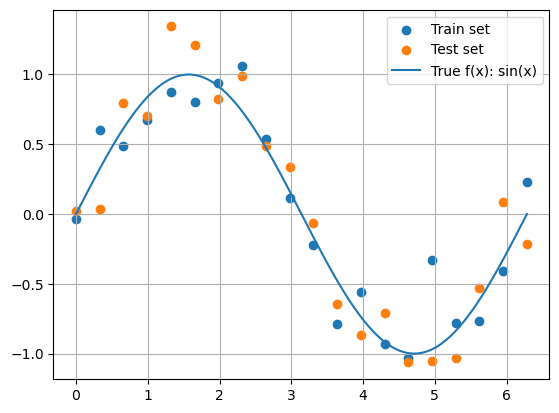

In [24]:
# TODO: generate new data and plot
def generate_sin(n, epsilon):
    x = np.linspace(0, 2 * np.pi, n)
    y = np.sin(x) + np.random.normal(0, epsilon, n)
    return x, y
    
n_samples = 20
x_train, y_train = generate_sin(n_samples, 0.2)
x_test, y_test = generate_sin(n_samples, 0.2)
x_pure = np.linspace(0, 2 * np.pi, 100)
y_pure = np.sin(x_pure)

plt.scatter(x_train, y_train, label="Train set")
plt.scatter(x_test, y_test, label="Test set")

plt.plot(x_pure, y_pure, label="True f(x): sin(x)")
plt.grid()
plt.legend()
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


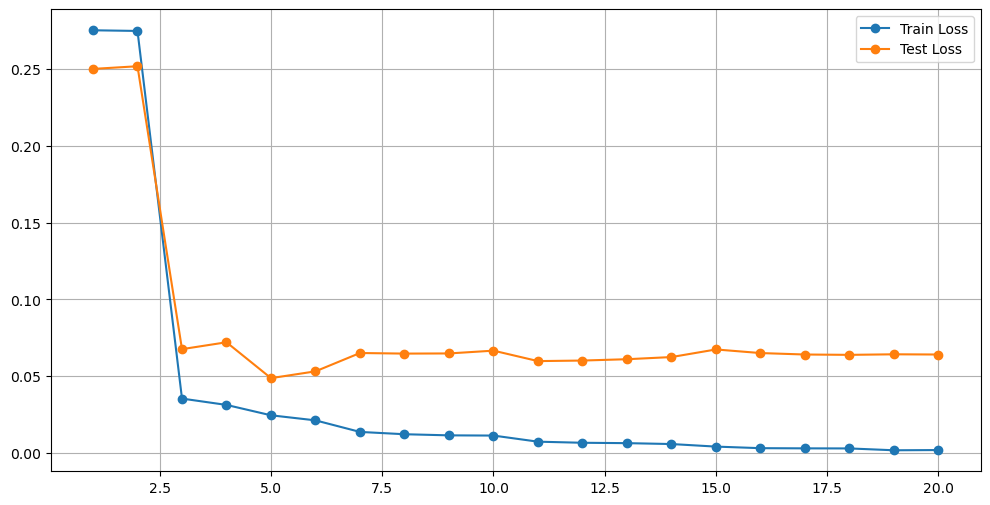

Best-fitting polynomial degree: 5


In [26]:
def generate_sin(n, epsilon):
    x = np.linspace(0, 2 * np.pi, n)
    y = np.sin(x) + np.random.normal(0, epsilon, n)
    return x, y

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
    
n_samples = 20
x_train, y_train = generate_sin(n_samples, 0.2)

# Generate test set
x_test, y_test = generate_sin(n_samples, 0.2)

# Degrees of polynomials to try
degrees = np.arange(1, 21)

# Lists to store results
train_losses = []
test_losses = []
coefficients_list = []

# Fit polynomials and compute losses for each degree
for degree in degrees:
    # Fit polynomial on training set
    coefficients = np.polyfit(x_train, y_train, degree)
    coefficients_list.append(coefficients)
    
    # Predict on training set
    y_train_pred = np.polyval(coefficients, x_train)
    
    # Predict on test set
    y_test_pred = np.polyval(coefficients, x_test)
    
    # Compute train and test losses
    train_loss = compute_mse(y_train, y_train_pred)
    test_loss = compute_mse(y_test, y_test_pred)
    
    # Save losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting the losses
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_losses, label='Train Loss', marker='o')
plt.plot(degrees, test_losses, label='Test Loss', marker='o')
plt.legend()
plt.grid()
plt.show()

# Displaying coefficients for the best-performing polynomial
best_degree = np.argmin(test_losses) + 1
print(f"Best-fitting polynomial degree: {best_degree}")

**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

It indicates that the polynomial fitting process might be numerically unstable due to ill-conditioning in the input data. Ill-conditioning means the value of the independent variable are very close to each other, leading to a nearly singular system of equations. This sensitivity to small changes in the input data can result in unreliable or inaccurate coefficient values. 

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


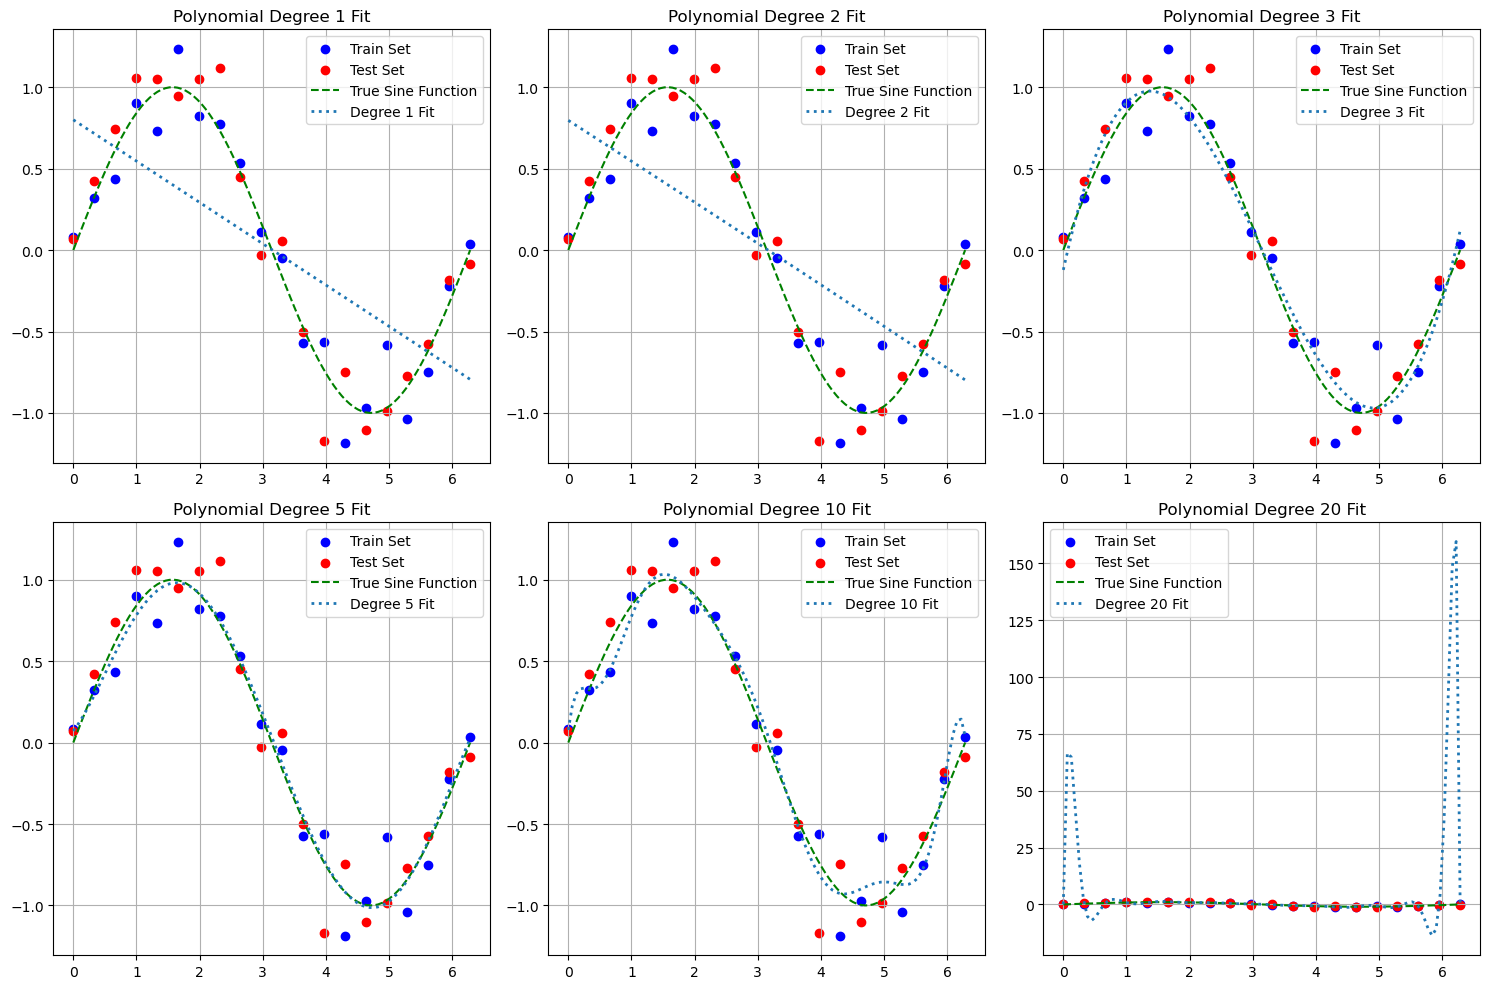

In [30]:
def generate_sin(n, epsilon):
    x = np.linspace(0, 2 * np.pi, n)
    y = np.sin(x) + np.random.normal(0, epsilon, n)
    return x, y

# Generate training set
n_samples = 20
x_train, y_train = generate_sin(n_samples, 0.2)

# Generate test set
x_test, y_test = generate_sin(n_samples, 0.2)

# True function without noise
x_true = np.linspace(0, 2 * np.pi, 100)
y_true = np.sin(x_true)

# Degrees of polynomials to plot
degrees_to_plot = [1, 2, 3, 5, 10, 20]

# Plotting
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees_to_plot, 1):
    plt.subplot(2, 3, i)
    
    # Fit polynomial on training set
    coefficients = np.polyfit(x_train, y_train, degree)
    
    # Predict on training set
    y_train_pred = np.polyval(coefficients, x_train)
    
    # Predict on test set
    y_test_pred = np.polyval(coefficients, x_test)
    
    # Plot training and test data
    plt.scatter(x_train, y_train, label='Train Set', color='blue')
    plt.scatter(x_test, y_test, label='Test Set', color='red')
    
    # Plot true function
    plt.plot(x_true, y_true, label='True Sine Function', linestyle='dashed', color='green')
    
    # Plot line of best fit
    x_fit = np.linspace(0, 2 * np.pi, 100)
    y_fit = np.polyval(coefficients, x_fit)
    plt.plot(x_fit, y_fit, label=f'Degree {degree} Fit', linestyle='dotted', linewidth=2)
    
    # Labels and legend
    plt.title(f'Polynomial Degree {degree} Fit')
    plt.legend()
    plt.grid()

# Adjust layout
plt.tight_layout()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3526: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


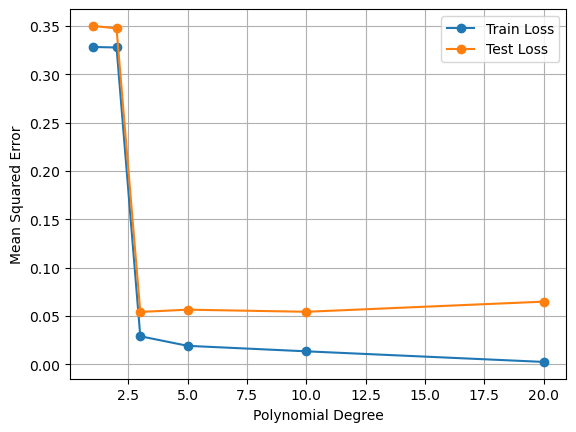

In [32]:
def generate_sin(n, epsilon):
    x = np.linspace(0, 2 * np.pi, n)
    y = np.sin(x) + np.random.normal(0, epsilon, n)
    return x, y

# Function to compute mean squared error
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Generate training set
n_samples = 20
x_train, y_train = generate_sin(n_samples, 0.2)

# Generate test set
x_test, y_test = generate_sin(n_samples, 0.2)

# Degrees of polynomials to try
degrees = [1, 2, 3, 5, 10, 20] 

# Lists to store results
train_losses = []
test_losses = []

# Fit polynomials and compute losses for each degree
for degree in degrees:
    # Fit polynomial on training set
    coefficients = np.polyfit(x_train, y_train, degree)
    
    # Predict on training set
    y_train_pred = np.polyval(coefficients, x_train)
    
    # Predict on test set
    y_test_pred = np.polyval(coefficients, x_test)
    
    # Compute train and test losses
    train_loss = compute_mse(y_train, y_train_pred)
    test_loss = compute_mse(y_test, y_test_pred)
    
    # Save losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plotting the losses
plt.plot(degrees, train_losses, label='Train Loss', marker='o')
plt.plot(degrees, test_losses, label='Test Loss', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. The polynomial models start to overfit when the test loss begins to increase while the training loss continues to decrease or remains low.  This is typically observed when the polynomial degree is high.

2. The model that fits the best to the training data is likely the one with the highest degree as it can capture all the points in the training set but for test set, degree 2 to 6 fits the best. These degree strike a balance between overfitting and underfitting of the dataset. 

3. The MSE is same for test and training data for all the ds because with more data, the model has a better learning curve which reduces overfitting.

4. No, increasing the number of training points is not always good. We need to keep the complexity of the model in mind, the noise in the model and inherent pattern in the data also matters.